# **Weather in Szeged 2006-2016**
*dataset obtained from Kaggle:* https://www.kaggle.com/budincsevity/szeged-weather
## **Objective:**
### Predict the apparent temperature based on humidity using a linear model.

# ------------------------------------------------------------------------------------

### Importing relevant libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the dataset.

In [2]:
weather_data = pd.read_csv('weatherHistory.csv')
X = weather_data.iloc[:, :-1].values
y = weather_data.iloc[:, -1].values

### Checking if there are missing data.

In [3]:
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
weather_data[['Humidity', 'Apparent Temperature (C)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Humidity                  96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


There aren't any missing values, which is good. Still, I'll check if these values aren't disguised as zeroes instead of np.nans with the following cell.

<AxesSubplot:>

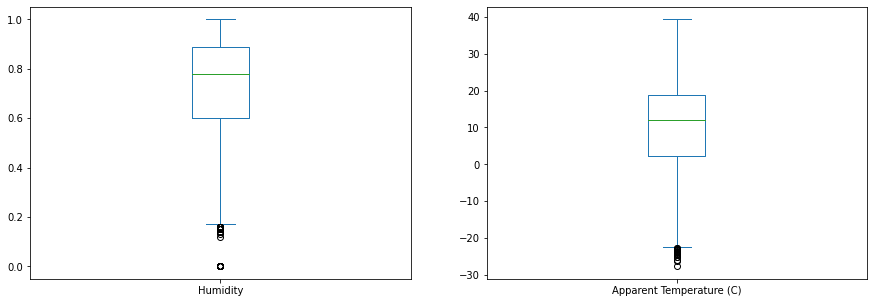

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

weather_data['Humidity'].plot(kind='box', ax=axes[0])
weather_data['Apparent Temperature (C)'].plot(kind='box', ax=axes[1])

In [6]:
weather_data[weather_data['Humidity'] == 0]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
19958,2008-02-17 14:00:00.000 +0100,Partly Cloudy,snow,-1.111111,-1.111111,0.0,4.4275,12.0,9.982,0.0,1043.04,Partly cloudy starting in the morning continui...
28101,2009-12-20 21:00:00.000 +0100,Clear,snow,-15.000000,-15.000000,0.0,3.2200,250.0,9.982,0.0,1015.10,Mostly cloudy starting overnight continuing un...
28103,2009-12-20 23:00:00.000 +0100,Clear,snow,-15.555556,-20.150000,0.0,6.4400,160.0,9.982,0.0,1015.90,Mostly cloudy starting overnight continuing un...
28110,2009-12-21 06:00:00.000 +0100,Clear,snow,-13.888889,-23.266667,0.0,22.5400,160.0,9.982,0.0,1016.80,Mostly cloudy starting in the morning.
29627,2009-01-25 11:00:00.000 +0100,Foggy,rain,1.111111,-3.950000,0.0,20.9300,350.0,0.161,0.0,1000.10,Foggy starting overnight continuing until afte...
54840,2012-02-10 00:00:00.000 +0100,Foggy,snow,-15.555556,-15.555556,0.0,3.2200,220.0,3.059,0.0,1030.80,Foggy starting in the morning continuing until...
54858,2012-02-10 18:00:00.000 +0100,Foggy,snow,-15.000000,-15.000000,0.0,0.0000,0.0,2.576,0.0,1034.40,Foggy starting in the morning continuing until...
54870,2012-02-11 06:00:00.000 +0100,Overcast,snow,-16.111111,-23.027778,0.0,11.2700,20.0,7.084,0.0,1029.90,Foggy starting overnight continuing until morn...
54872,2012-02-11 08:00:00.000 +0100,Overcast,snow,-15.000000,-22.738889,0.0,14.4900,30.0,9.982,0.0,1029.80,Foggy starting overnight continuing until morn...
54873,2012-02-11 09:00:00.000 +0100,Overcast,snow,-13.888889,-20.350000,0.0,11.2700,40.0,9.982,0.0,1029.90,Foggy starting overnight continuing until morn...


### **NOTE**: Given how (according to a quick Google search) humidity = 0 is pretty much impossible and not something that happens in real life, I assumed that the fractions of data above were not catalogued correctly and thus decided to remove them. 

### Reassigning variables:

In [11]:
weather_data = weather_data[weather_data['Humidity'] != 0]
X = weather_data.iloc[:, 5].values
y = weather_data.iloc[:, 4].values

### Splitting dataset into test and train sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

[0.8  0.27 0.51 ... 0.9  0.82 0.9 ]


In [13]:
weather_data[['Humidity', 'Apparent Temperature (C)']].head(50)

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778
5,0.85,7.111111
6,0.95,5.522222
7,0.89,6.527778
8,0.82,10.822222
9,0.72,13.772222


### Applying Feature Scaling onto the Apparent Temperature column.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(-1, 1))
X_test = sc.transform(X_test.reshape(-1, 1))

### Creating the Linear Regression model

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Silly prediction for testing purposes:

In [39]:
print(regressor.predict([[5.9]]))

[-27.41]


### Predicting the test set results and comparing them with the test set

In [23]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.4  12.93]
 [ 4.4  -0.67]
 [ 4.4   2.27]
 ...
 [16.36 14.64]
 [20.01 25.09]
 [ 9.71  5.89]]


### Visualizing the results in the test set, train set and comparing them with the ground truth.

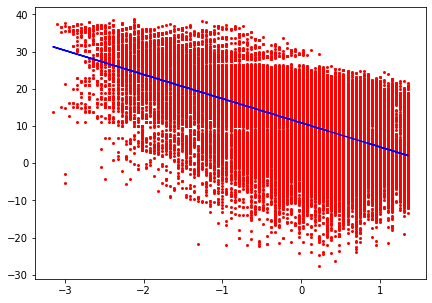

In [34]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, color='red', s=4)
plt.plot(X_train, regressor.predict(X_train), color='blue')

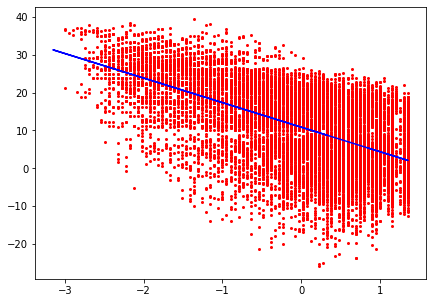

In [37]:
fig = plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='red', s=4)
plt.plot(X_train, regressor.predict(X_train), color='blue')

## Conclusion: it's possible to predict the Apparent Temperature (C) based on the humidity, thought the accuracy of said prediction is not precise, at least not for a linear model.